In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing

df = pd.read_csv('Admission_Predict.csv')

**Note:** While working on the first optional assignment, I became curious about the future changes in salaries and job trends. Consequently, I opted to pursue the second optional assignment using the dataset I had been exploring.

**Note:** Before even starting the data exploration and then data prediction I want to make all categorical values numerical for comfortable work with the data.

In [98]:
df = df.drop(['Serial No.'], axis=1)
df.isnull().sum()


GRE_Score            0
TOEFL_Score          0
University_Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance_of_Admit      0
dtype: int64

## Exercise 1
a) Create and train simple regression model of sqft_living to price.  
b) Evaluate and visualise created model.  
c) Create and plot higher order polynomial regression models.

In [99]:
#a)

X = df.GRE_Score .values.reshape(-1,1)[:1000]
y = df.CGPA.values.reshape(-1)[:1000]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
model = LinearRegression().fit(X_train, y_train)


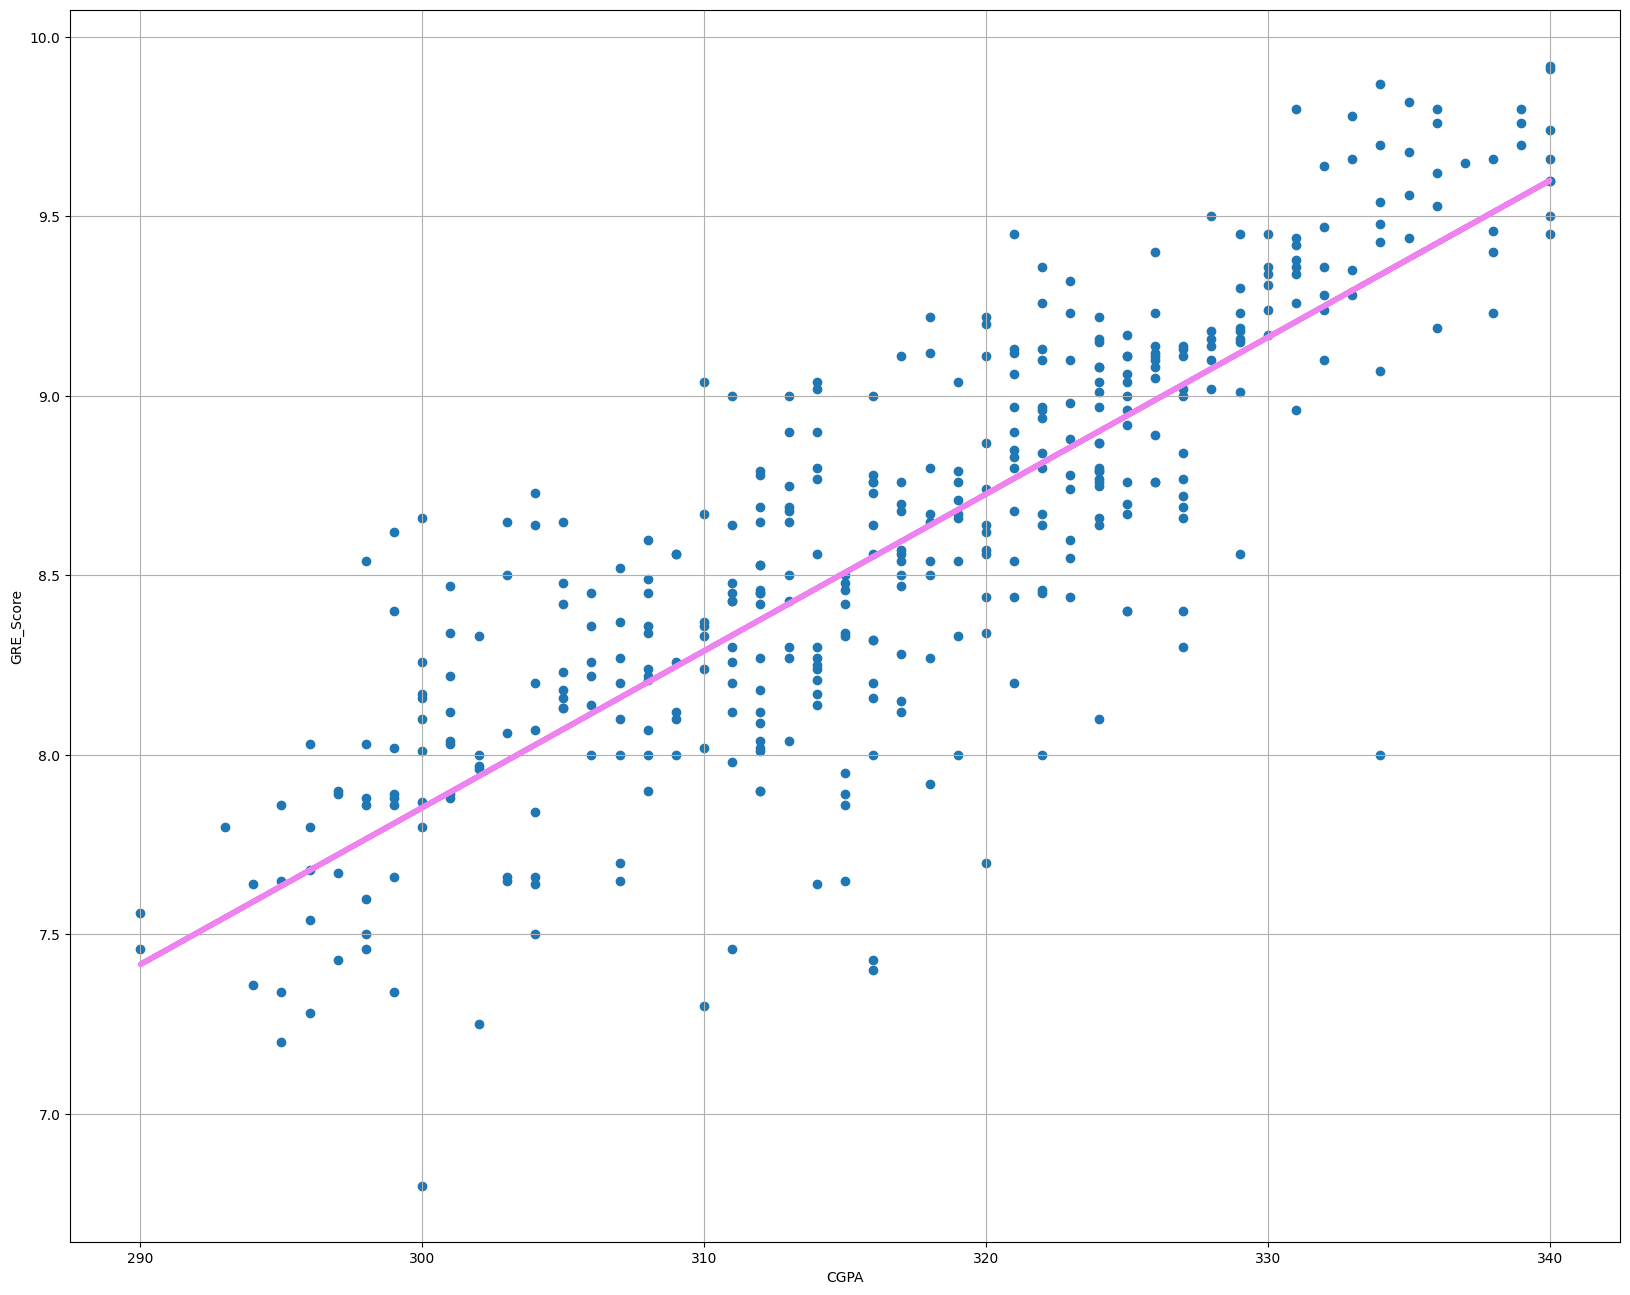

In [100]:
#b)
#Your code:
fig, ax = plt.subplots(figsize=(20, 16))

ax.set_ylabel('GRE_Score')
ax.set_xlabel('CGPA')

ax.plot(X, (model.intercept_ + X * model.coef_), 'violet', linewidth=4)
ax.scatter(X, y)
ax.grid()

In [89]:
ms = model.score(X_test, y_test)
mse = mean_squared_error(X_test, y_test)

print('Model score is:', ms)
print('Mean squared error is:', mse)

Model score is: 0.6856899025977414
Mean squared error is: 94600.94692333332


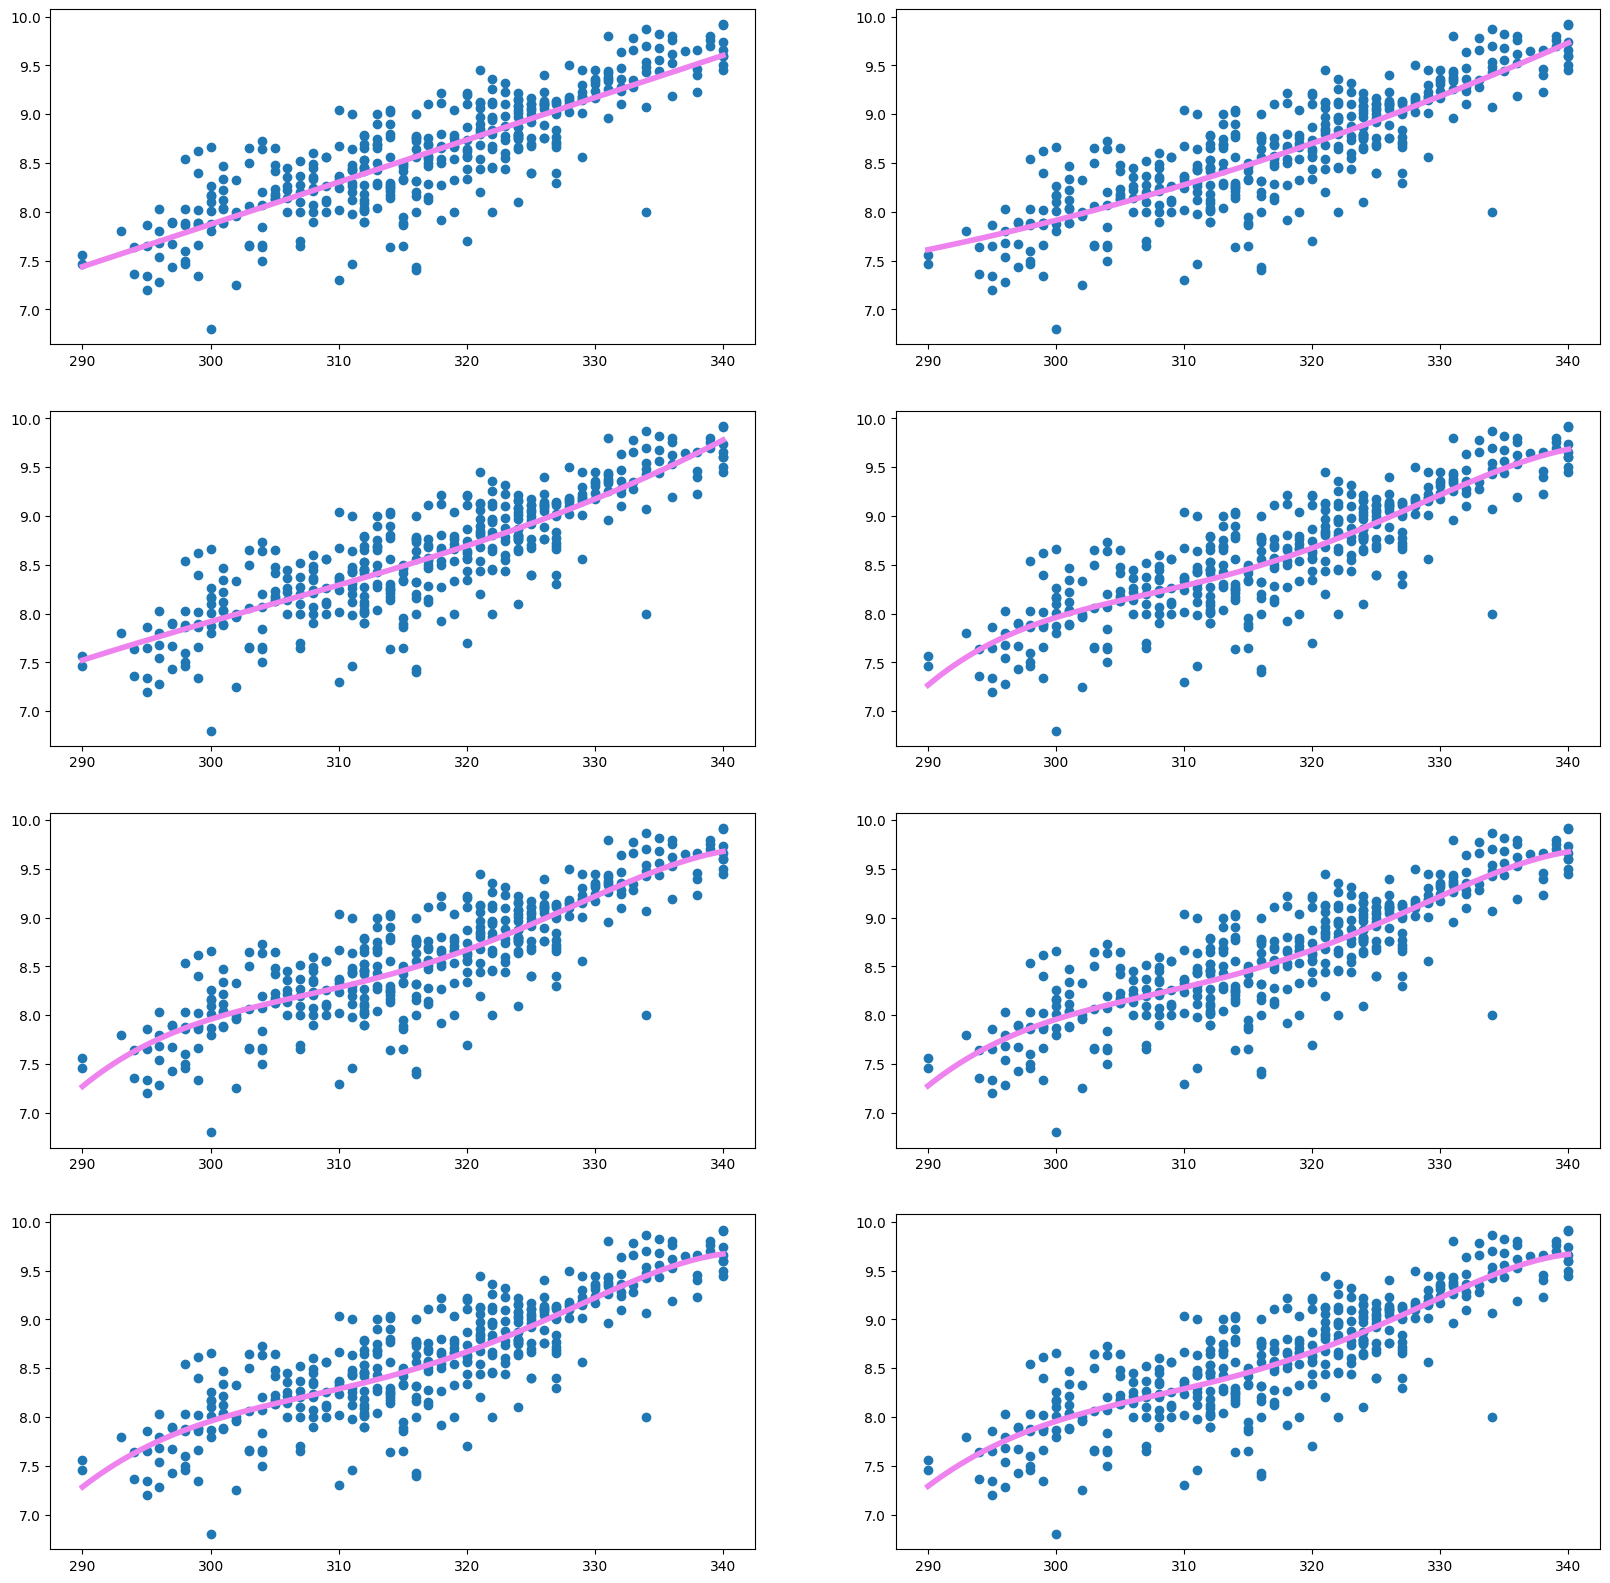

In [90]:
#c)
mean_array = []
fig, ax = plt.subplots(4, 2, figsize =(20, 20))

for order in range(1,9):
    
    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X)
    
    model.fit(X_order, y)
    
    X_range = np.linspace(min(X), max(X), 100).reshape(-1, 1)
    X_range_ordering = poly.transform(X_range)

    y_predict = model.predict(X_range_ordering)

    column_queueing = 0 if order % 2 == 1 else 1

    ax[(order - 1) // 2, column_queueing].scatter(X, y)
    ax[(order - 1) // 2, column_queueing].plot(X_range, y_predict, 'violet', linewidth=4)

    mean_array.append(mean_squared_error(y, model.predict(X_order)))


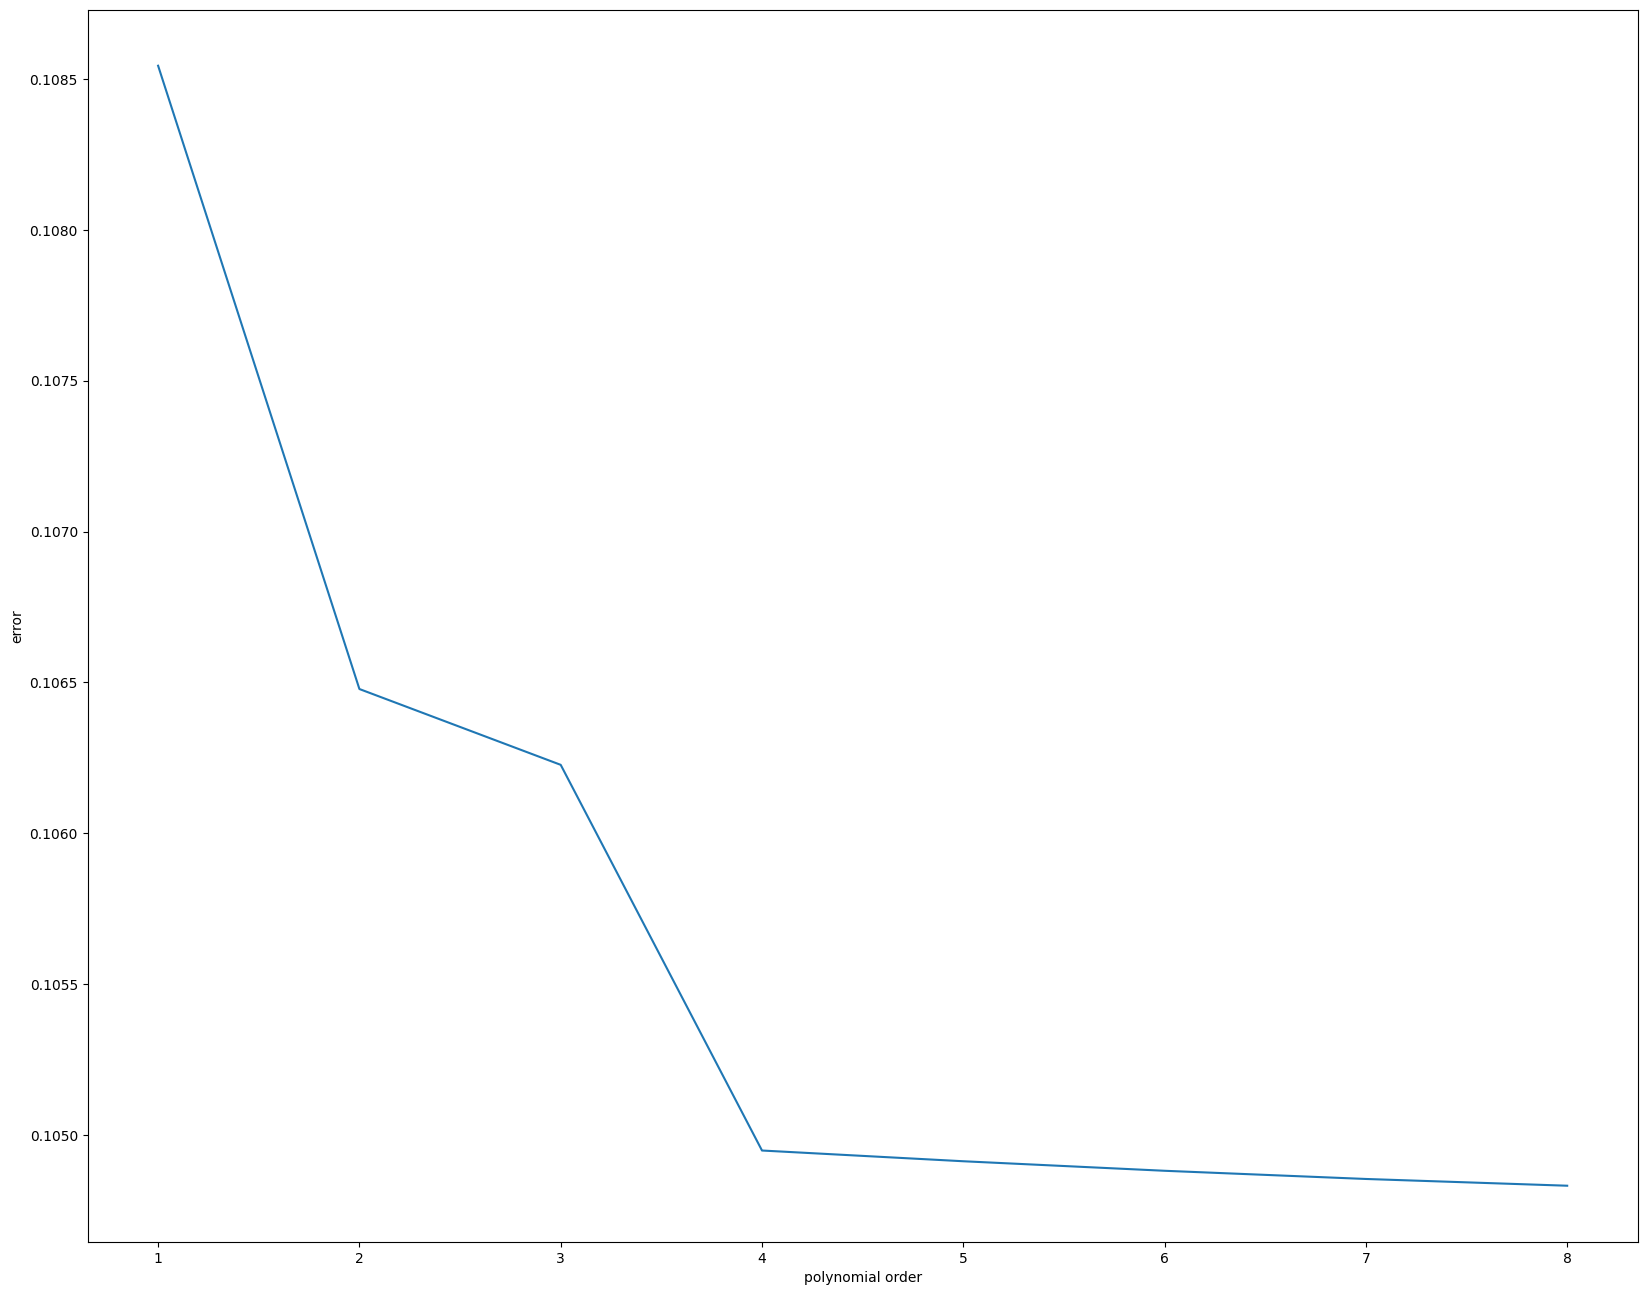

In [91]:
#Your code:


degree = list(range(1, 9))
fig, ax = plt.subplots(figsize=(20, 16))
ax.set_xlabel('polynomial order')
ax.set_ylabel('error')
ax.plot(degree, mean_array)

## Exercise 2
In reality, we are not given the full dataset, so we need to create models which are able to handle unknown data.  
a) Split your data into training sample and test sample and repeat exercise 1 c). Plot training and test errors for all models. 

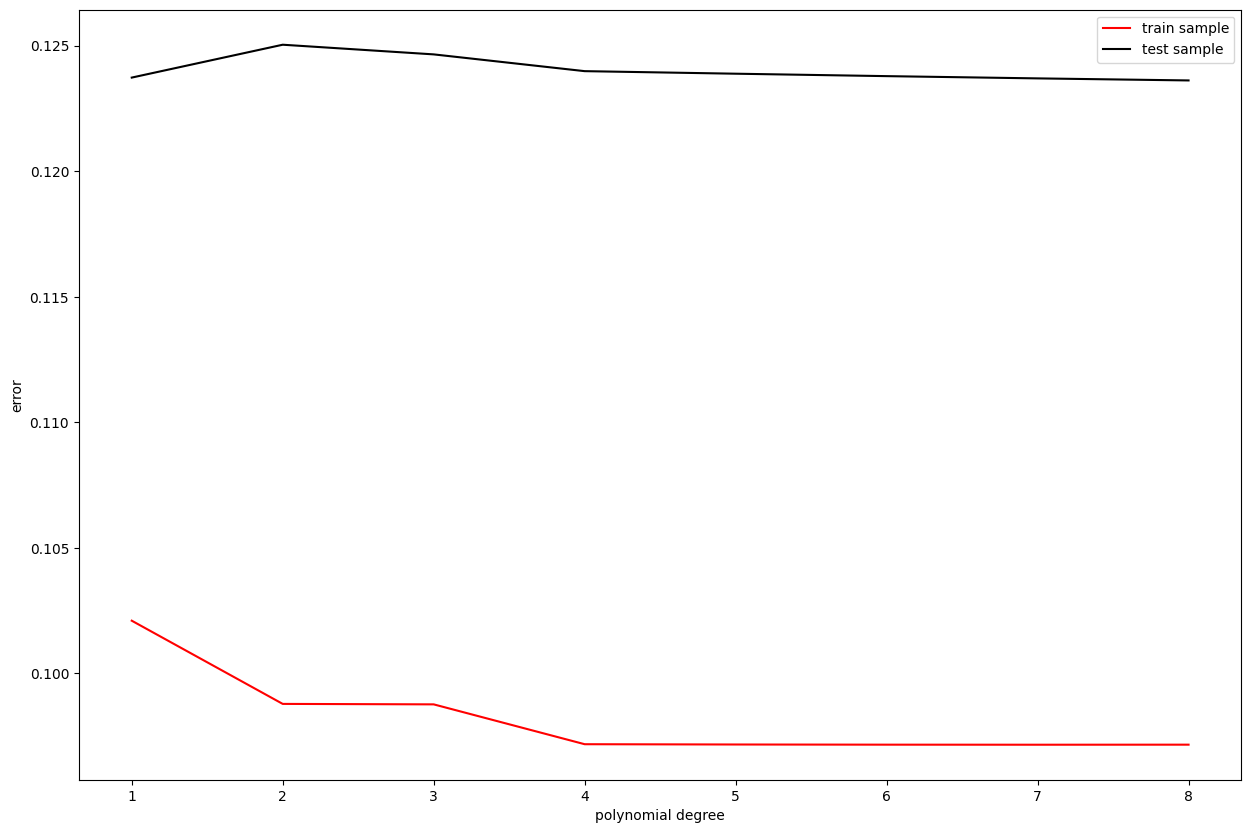

In [92]:
train_sample = []
test_sample = []



for order in range(1,9):
    poly = PolynomialFeatures(order, include_bias=False)
    X_order = poly.fit_transform(X)

    
    X_train, X_test, y_train, y_test = train_test_split(X_order, y, test_size=0.3, random_state=44)
    
    model.fit(X_train, y_train)

    y_predict = model.predict(X_train)
    train_sample.append(mean_squared_error(y_train, y_predict))

    y_predict = model.predict(X_test)
    test_sample.append(mean_squared_error(y_test, y_predict))

fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(degree, train_sample, 'red', label='train sample')
ax.plot(degree, test_sample, 'black', label='test sample')
plt.xlabel('polynomial degree')
plt.ylabel('error')

plt.legend()

## Exercise 3
a) Train model to predict sqft_living for a given house price. Plot predictions.  
b) Apply more features and propose better model for predicting house prices. Try to beat proposed one.

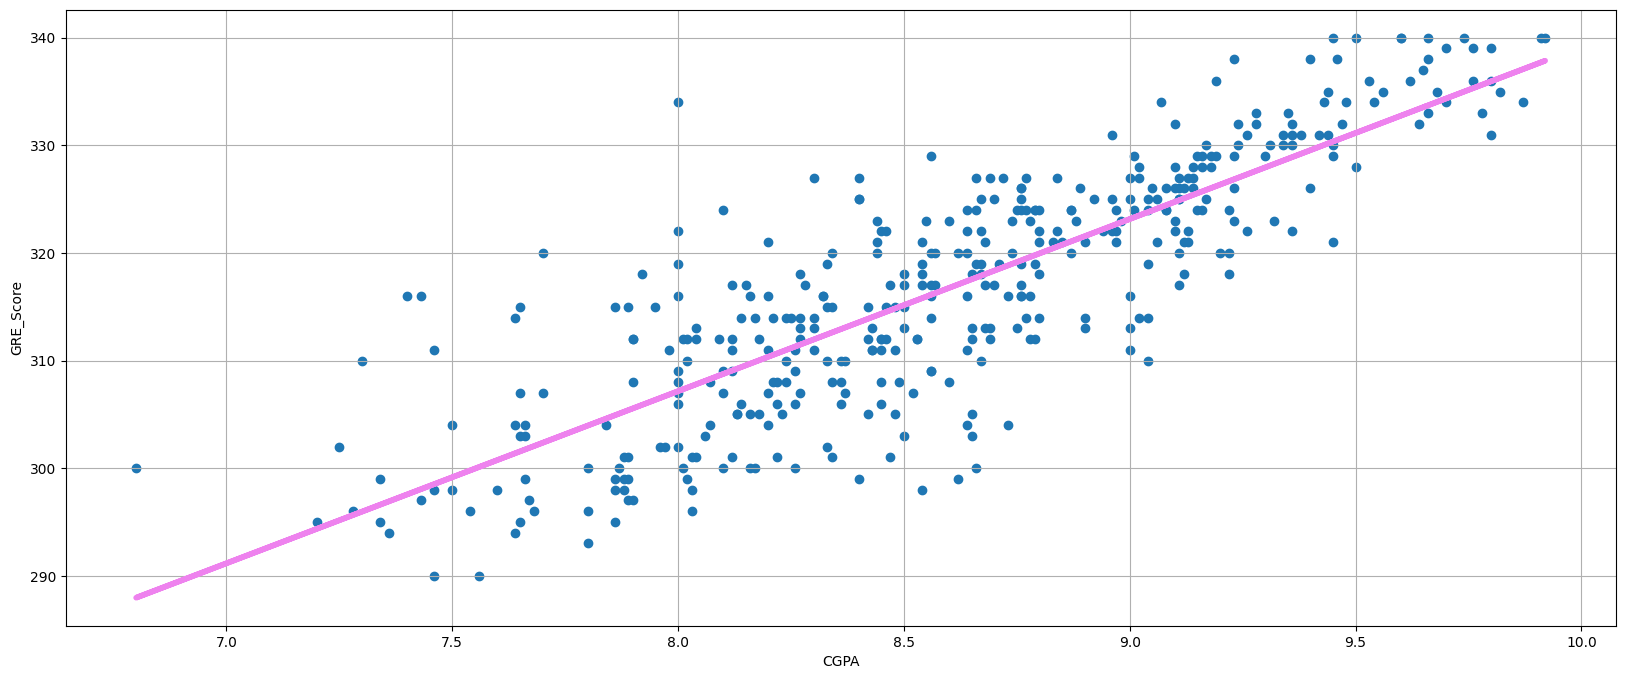

In [101]:

X = df.CGPA.values.reshape(-1,1)[:1000]
y = df.GRE_Score.values.reshape(-1)[:1000]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
model = LinearRegression()
model.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(20, 8))
ax.set_xlabel('CGPA')
ax.set_ylabel('GRE_Score')

line = model.intercept_ + X * model.coef_

ax.plot(X, line, 'violet', linewidth=4)
ax.scatter(X, y)
ax.grid()


In [102]:
#b) Let's propose model, which uses living sqft, lot sqft, grade, view and all of their interactions up to third degree

X = df[['TOEFL_Score', 'CGPA', 'SOP']].values.reshape(-1, 3)

y = df.GRE_Score.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))


#Your model:


Mean squared error equals: 33.8864715057196
